In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('datasets/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#定义一个函数
def read_dataset(fname):
    #指定第一行为索引
    data = pd.read_csv(fname,index_col=0)
    #丢弃无用的数据
    data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
    #处理性别数据
    data['Sex'] = (data['Sex'] == 'male').astype('int')
    #处理登录港口数据
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n))
    #处理缺失数据
    data = data.fillna(0)
    return data
train = read_dataset('datasets/titanic/train.csv')    

In [5]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [6]:
from sklearn.model_selection import train_test_split

y = train['Survived'].values
x = train.drop(['Survived'],axis=1).values
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)
print("train data:{0};test data:{1}".format(X_train.shape,X_test.shape))

train data:(712, 7);test data:(179, 7)


In [7]:
#使用决策树模型拟合
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
train_score = clf.score(X_train,Y_train)
test_score = clf.score(X_test,Y_test)
print("train_score:{0};test_score:{1}".format(train_score,test_score))


train_score:0.9831460674157303;test_score:0.7318435754189944


In [8]:
#max_depth参数选择
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train,Y_train)
    tr_score = clf.score(X_train,Y_train)
    cv_score = clf.score(X_test,Y_test)
    return (tr_score,cv_score)
#构造参数范围，并找出最高的模型数据
depths = range(2,15)
score = [cv_score(d) for d in depths]
tr_score = [s[0] for s in score]
cv_score = [s[1] for s in score]
#找出评分最高的索引
best_score_index = np.argmax(cv_score)
best_score = cv_score[best_score_index]
best_param = depths[best_score_index]
print("best param:{};best score:{}".format(best_param,best_score))

best param:3;best score:0.7597765363128491


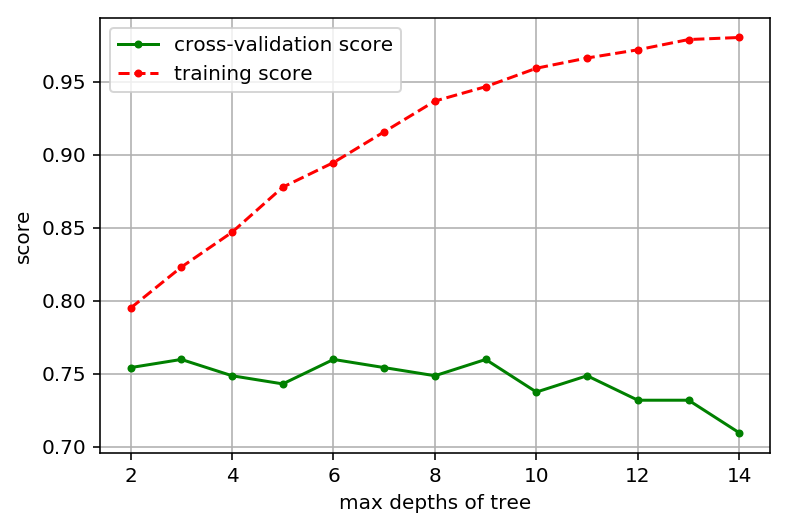

In [9]:
#把模型参数与模型评分画出来
plt.figure(figsize=(6,4),dpi=144)
plt.grid()
plt.xlabel('max depths of tree')
plt.ylabel('score')
plt.plot(depths,cv_score,'.g-',label = 'cross-validation score')
plt.plot(depths,tr_score,'.r--',label = 'training score')
plt.legend()

In [10]:
#训练模型并计算得分
def cv_score(val):
    clf = DecisionTreeClassifier(criterion='gini',min_impurity_split=val)
    clf.fit(X_train,Y_train)
    tr_score = clf.score(X_train,Y_train)
    cv_score = clf.score(X_test,Y_test)
    return (tr_score,cv_score)

In [11]:
#指定参数范围
values = np.linspace(0,0.5,50)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

In [12]:
#找出评分最高的模型参数
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print("best param:{};best score:{}".format(best_param,best_score))

best param:0.31632653061224486;best score:0.7877094972067039


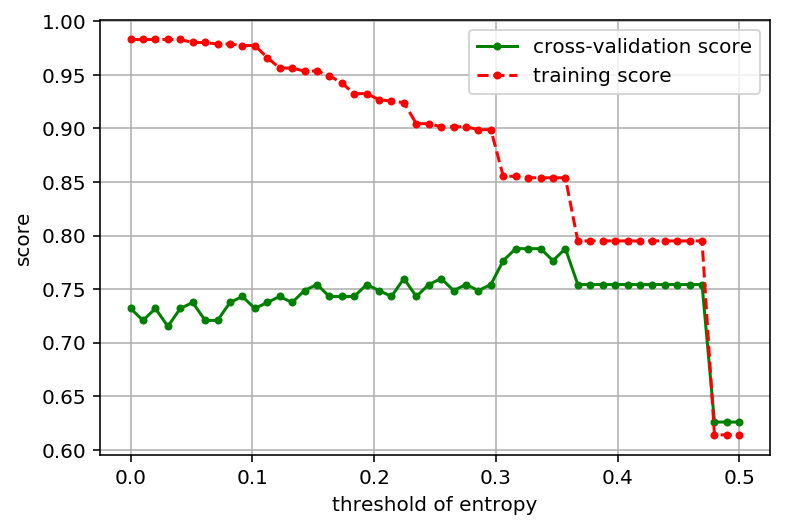

In [13]:
#画出模型参数与模型评分的关系
plt.figure(figsize=(6,4),dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values,cv_scores,'.g-',label = 'cross-validation score')
plt.plot(values,tr_scores,'.r--',label = 'training score')
plt.legend()

In [14]:
def plot_curve(train_size,cv_results,xlabel):
    train_score_mean = cv_results['mean_train_score']
    train_score_std = cv_results['std_train_score']
    test_score_mean = cv_results['mean_test_score']
    test_score_std = cv_results['std_test_score']
    plt.figure(figsize=(6,4),dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_size,train_score_mean-train_score_std,train_score_mean+train_score_std,alpha=0.1,color="r")
    plt.fill_between(train_size,test_score_mean-test_score_std,test_score_mean+test_score_std,alpha=0.1,color="g")
    plt.plot(train_size,train_score_mean,'.--',color='r',label="Training score")
    plt.plot(train_size,test_score_mean,'.-',color='g',label="Cross-validation score")
    plt.legend(loc="best")

In [15]:
from sklearn.model_selection import GridSearchCV
thresholds = np.linspace(0,0.5,50)
#设置参数矩阵
param_grid = {'min_impurity_split':thresholds}
clf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,return_train_score=True)
clf.fit(x,y)

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n...
       0.25510204, 0.26530612, 0.2755102 , 0.28571429, 0.29591837,
       0.30612245, 0.31632653, 0.32653061, 0.33673469, 0.34693878,
       0.3

In [16]:
print("best param:{0}\nbest score:{1}".format(clf.best_params_,clf.best_score_))

best param:{'min_impurity_split': 0.2040816326530612}
best score:0.8204264870931538


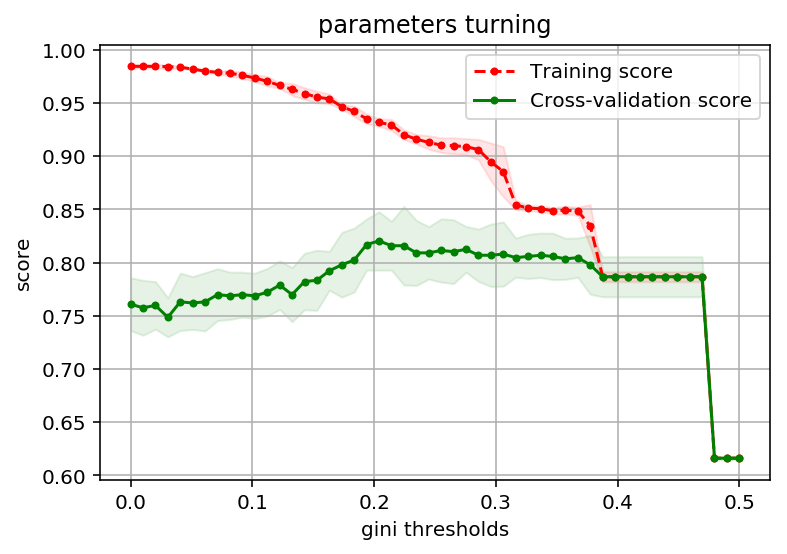

In [17]:
plot_curve(thresholds,clf.cv_results_,xlabel='gini thresholds')

In [18]:
#多组参数中找最优的参数
from sklearn.model_selection import GridSearchCV
entropy_thresholds = np.linspace(0,1,50)
gini_thresholds = np.linspace(0,0.5,50)
#设置参数矩阵
param_grid = [{'criterion':['entropy'],'min_impurity_split':entropy_thresholds},
              {'criterion':['gini'],'min_impurity_split':gini_thresholds},
              {'max_depth':range(2,10),'min_impurity_split':range(2,30,2)}]

clf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
clf.fit(x,y)

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
E:\Anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split pa

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n...
       0.30612245, 0.31632653, 0.32653061, 0.33673469, 0.34693878,
       0.35714286, 0.36734694, 0.37755102, 0.3877551 , 0.39795918,
       0.4

In [19]:
print("best parem :{0}\n best score :{1}".format(clf.best_params_,clf.best_score_))

best parem :{'criterion': 'entropy', 'min_impurity_split': 0.5306122448979591}
 best score :0.8249158249158249
